In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [78]:
air=pd.read_csv('airquality.csv')

In [79]:
air.shape

(153, 7)

In [80]:
air.head(15)

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
0,1,41.0,190.0,7.4,67,5,1
1,2,36.0,118.0,8.0,72,5,2
2,3,12.0,149.0,12.6,74,5,3
3,4,18.0,313.0,11.5,62,5,4
4,5,NaN,NaN,14.3,56,5,5
5,6,28.0,NaN,14.9,66,5,6
6,7,23.0,299.0,8.6,65,5,7
7,8,19.0,99.0,13.8,59,5,8
8,9,8.0,19.0,20.1,61,5,9
9,10,NaN,194.0,8.6,69,5,10


In [81]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  153 non-null    int64  
 1   Ozone       116 non-null    float64
 2   Solar.R     146 non-null    float64
 3   Wind        153 non-null    float64
 4   Temp        153 non-null    int64  
 5   Month       153 non-null    int64  
 6   Day         153 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 8.4 KB


In [82]:
air.describe()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp,Month,Day
count,153.000000,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,77.000000,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,44.311398,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,39.000000,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,77.000000,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,115.000000,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,153.000000,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [83]:
air.count()

Unnamed: 0    153
Ozone         116
Solar.R       146
Wind          153
Temp          153
Month         153
Day           153
dtype: int64

In [84]:
air.isnull().sum()

Unnamed: 0     0
Ozone         37
Solar.R        7
Wind           0
Temp           0
Month          0
Day            0
dtype: int64

In [85]:
air.drop('Unnamed: 0',axis=1,inplace=True)

In [86]:
#1.Data Cleaning
A=air.dropna()
A.shape

(111, 6)

In [87]:
A=air.fillna(0)
A.shape

(153, 6)

In [88]:
#2.Error Correcting: Padding
##(i)ForwardFill
A=air.ffill()
A.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,18.0,313.0,14.3,56,5,5
5,28.0,313.0,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,8.0,194.0,8.6,69,5,10


In [89]:
#2.Error Correcting :Padding
##(ii)BackwardFill
A=air.bfill()
A.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,28.0,299.0,14.3,56,5,5
5,28.0,299.0,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,7.0,194.0,8.6,69,5,10


In [90]:
#2.Error Correcting :Replace NaN values with mean,median,variance!
A=air['Ozone'].replace(np.nan,air['Ozone'].mean())
A.head(5)

0    41.00000
1    36.00000
2    12.00000
3    18.00000
4    42.12931
Name: Ozone, dtype: float64

In [91]:
#2.Error Correcting :SimpleImputer with strategy='mean'or'most_frequent'!
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
A=imp.fit_transform(air)
A=pd.DataFrame(A,columns=air.columns)
A

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67.0,5.0,1.0
1,36.00000,118.000000,8.0,72.0,5.0,2.0
2,12.00000,149.000000,12.6,74.0,5.0,3.0
3,18.00000,313.000000,11.5,62.0,5.0,4.0
4,42.12931,185.931507,14.3,56.0,5.0,5.0
...,...,...,...,...,...,...
148,30.00000,193.000000,6.9,70.0,9.0,26.0
149,42.12931,145.000000,13.2,77.0,9.0,27.0
150,14.00000,191.000000,14.3,75.0,9.0,28.0
151,18.00000,131.000000,8.0,76.0,9.0,29.0


In [92]:
#3.Data Tranformation:StandardScaler
scaler=StandardScaler()
B=scaler.fit_transform(A)
pd.DataFrame(B).describe()

,0,1,2,3,4,5
count,1.530000e+02,1.530000e+02,1.530000e+02,1.530000e+02,153.000000,1.530000e+02
mean,-2.322035e-17,-1.741526e-17,-2.322035e-17,7.430512e-16,0.000000,-6.966105e-17
std,1.003284e+00,1.003284e+00,1.003284e+00,1.003284e+00,1.003284,1.003284e+00
min,-1.438115e+00,-2.040912e+00,-2.351584e+00,-2.319450e+00,-1.411916,-1.675504e+00
25%,-7.388013e-01,-7.520217e-01,-7.283322e-01,-6.235080e-01,-0.703643,-8.832458e-01
50%,0.000000e+00,9.203008e-02,-7.333578e-02,1.184665e-01,0.004629,2.219211e-02
75%,1.353414e-01,7.992086e-01,4.392701e-01,7.544446e-01,0.712902,8.144503e-01
max,4.401158e+00,1.688885e+00,3.059256e+00,2.026401e+00,1.421174,1.719888e+00


In [93]:
#3.Data Tranformation:MinMaxScaler
scaler=MinMaxScaler()
B=scaler.fit_transform(A)
pd.DataFrame(B).describe()

,0,1,2,3,4,5
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.246283,0.547191,0.434606,0.533716,0.498366,0.493464
std,0.171817,0.268992,0.185421,0.230860,0.354131,0.295484
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.119760,0.345566,0.300000,0.390244,0.250000,0.233333
50%,0.246283,0.571865,0.421053,0.560976,0.500000,0.500000
75%,0.269461,0.761468,0.515789,0.707317,0.750000,0.733333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [101]:
#3.Data Tranformation:Binarization
binz=Binarizer(threshold=0.5)
B=binz.fit_transform(A)
pd.DataFrame(B)

,0,1,2,3,4,5
0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
148,1.0,1.0,1.0,1.0,1.0,1.0
149,1.0,1.0,1.0,1.0,1.0,1.0
150,1.0,1.0,1.0,1.0,1.0,1.0
151,1.0,1.0,1.0,1.0,1.0,1.0


In [103]:
#Data Model Building
train,test=train_test_split(A, test_size=0.20)

In [110]:
X= A['Ozone'].values
X=X.reshape(-1,1)
Y= A['Temp'].values

In [111]:
model=LinearRegression()
model.fit(X,Y)

LinearRegression()

In [112]:
model.score(X,Y)*100

37.056682983646425

In [113]:
model.predict([[128]])

array([95.12601986])

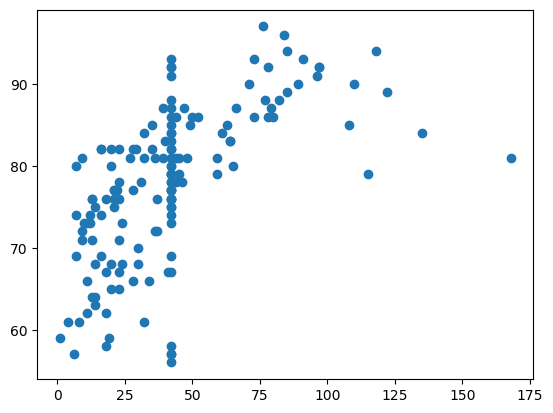

In [114]:
plt.scatter(X,Y)
plt.xlabel("OZONE")
plt.ylabel("TEMP")
plt.title('Ozone vs Temp')
